![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Transições

# Parte 1: Newton

Vamos ver em um caso o que acontece para o método de Newton não convergir.

Comece com o método em si:

In [2]:
def newton_solve(_f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100, full=False):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f.  iterations?
    
    Se full=True, retorna a lista de todos os pontos gerados. (só usado a partir da 4a questão)"""
    nevals = 0
    
    def auxiliar(x):
        return _f(x) - y
    
    f = auxiliar

    a = f(x0)
    if a == y:
        return [x0], 1
    if(a == 0 ):
        x_ans = x0 - 1e-12
    else:
        x_ans = x0
    
    x = [x0]
    f_y = f(x_ans)

    n = 0
    for i in range(maxiter):
        n+=1

        # dá o passo para o próximo x_ans
        dv_value = df(x_ans)
        if(dv_value != 0 ):
            step = ( f_y - 0)/dv_value

        x_ans = x_ans - step
        
        x.append(x_ans)
        
        f_y = f(x_ans)

        if (abs(step) < xtol or abs(f_y-0) < ytol):
            if full == True:
                return x, n
            else:
                return x[-1], n

    if full == True:
        return x, n

    return x[-1], n

In [3]:
import warnings

# Senão vai ficar muito pesado...
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="overflow encountered in double_scalars")

## Questão 1: Vendo a transição

Faça o gráfico do número de iterações, em função do ponto inicial,
para encontrar a raiz do arco-tangente.

In [4]:
def cauchy(x):
    return 1/(1 + x**2)

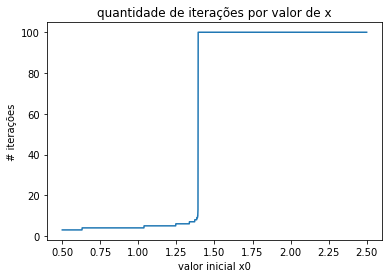

In [5]:
xs = np.linspace(0.5, 2.5, num=3000)

iters = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]

plt.plot(xs, iters)
plt.title("quantidade de iterações por valor de x")
plt.xlabel("valor inicial x0")
plt.ylabel("# iterações")
ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [7]:
ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [8]:
ax = None

Refaça o gráfico, para destacar a transição

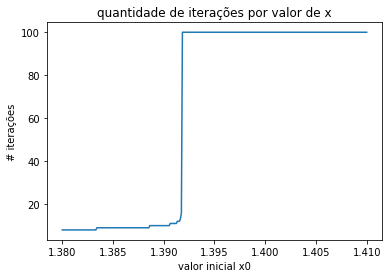

In [9]:
xs = np.linspace(1.38, 1.41, num=300)

iters = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]

plt.plot(xs, iters)
plt.title("quantidade de iterações por valor de x")
plt.xlabel("valor inicial x0")
plt.ylabel("# iterações")
ax = plt.gca()

In [10]:
assert len(ax.lines) == 1
xs = ax.lines[0].get_xdata()
ys = ax.lines[0].get_ydata()
assert max(xs) - min(xs) <= 0.25
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [11]:
ax = None

Porque os `assert`s acima garantem o destaque?

Com o assert sobre o xs, você garante que o intervalo mostrado é menor do que o desejado.
E com o assert sobre o ys, você garante que tem uma transição no gráfico. E como só tinha uma transição de menor que 10 para igual a 100 no número de iterações, é a transição certa 

## Questão 2: Calculando a transição

Use o método da bisseção para calcular
- o último valor (`float` do python) de $x_0$ para o qual o método de Newton encontra a raiz do arco tangente; e (ao mesmo tempo)
- o primeiro valor de $x_0$ para o qual o método não encontra a raiz.

Chame-os de `a` e `b`.

In [12]:
def bissecao_newton(f, a, b, xtol=1e-8): # xtol tem que ser o tamanho de 1 float
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    m = (a+b)/2
    m_list = [m]
    _xtol = abs(b-a)
    _ytol = abs(f(m))
    i = 0
    while (_xtol >= xtol):
        # verifica se os sinais tão invertidos com o ponto médio
        # e escolhe a bisseção correta
        _, na = newton_solve(np.arctan, cauchy, 0, a)
        na -= 80
        _, nm = newton_solve(np.arctan, cauchy, 0, m)
        nm -= 80

        if (na * nm < 0):
            b = m
        else:
            a = m
        
        # calcula o ponto médio do novo intervalo
        m = (a+b)/2
        _xtol = abs(b-a)
        i+=1

    return a, b

a, b = 1.38, 1.41
a, b = bissecao_newton(np.arctan,a, b, 3e-16)

In [13]:
r, n = newton_solve(np.arctan, cauchy, 0, a, maxiter=100)
assert np.abs(r) < 1e-8
assert 30 < n < 100

In [14]:
r, n = newton_solve(np.arctan, cauchy, 0, b, maxiter=1000)
assert np.abs(r) > 1e-1
assert n == 1000

In [15]:
assert 0 < b-a < 3e-16

## Questão 3: Um gráfico mais preciso

Faça o gráfico do número de iterações para vários pontos "até chegar em $a$".
Pense nas escalas, e também em como "se aproximar de $a$".

1.3917452002707347


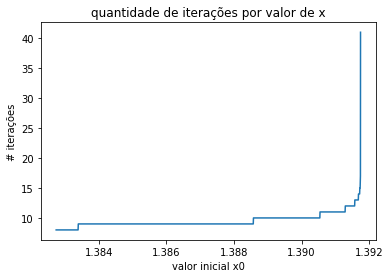

In [16]:
# pegar o número de iterações até chegar em a
    # todos entre 0.5 e a vão chegar em a
xs = np.linspace(a - 3000*3e-6, a, num=3000, endpoint=True)
iters = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]

plt.plot(xs, iters)
plt.plot()
plt.title("quantidade de iterações por valor de x")
plt.xlabel("valor inicial x0")
plt.ylabel("# iterações")
print(a)
ax = plt.gca()

In [17]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert 40 < max(ys) < 60

In [18]:
ax = None

Quão rápido (ou devagar) o método de Newton para de funcionar ao se aproximar de $a$?

O método do newton para de funcionar bem rápido ao se aproximar de a, ou seja, você pode se aproximar muito que ele ainda funciona bem, mas quando chega muito perto do $a$, ele rapidamente para de funcionar.

O que acontece com o método de Newton no ponto $b$?
Faça as contas (ou gráfico(s)) abaixo, e explique em seguida

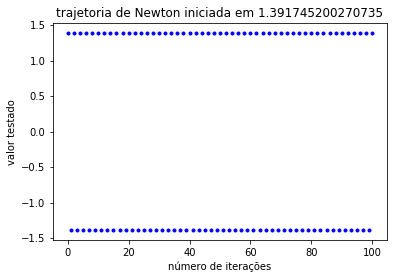

In [19]:
trace, n = newton_solve(np.arctan, cauchy, 0, b, full=True)
plt.plot(range(n+1), trace, 'b.');
plt.title(f"trajetoria de Newton iniciada em {b}");
plt.xlabel("número de iterações")
plt.ylabel("valor testado");

O método de Newton fica alternando entre dois valores, e não converge

## Questão 4: Encontrando outras raízes

Vamos ver o que acontece quando, em vez de zero, queremos resolver $\arctan(x) = y$, para outros valores de $y$.

In [20]:

xtol = 3e-16
def transição(f, df, y, a, b):
    """Encontra uma transição do método de Newton para resolver  f(x) = y  no intervalo [a,b].
    Retorna o par de pontos limite."""

    m = (a+b)/2
    m_list = [m]
    _xtol = abs(b-a)

    K = 99

    while (True):
        # verifica se os sinais tão invertidos com o ponto médio
        # e escolhe a bisseção correta
        _, na = newton_solve(f, df, y, a)
        _, nm = newton_solve(f, df, y, m)

        na -= K
        nm -= K


        if (na * nm < 0):
            b = m
        else:
            a = m
        
        _xtol = abs(b-a)
        
        if(_xtol <= xtol):
            return a, b

        # calcula o ponto médio do novo intervalo
        m = (a+b)/2

In [21]:
# Deveria reproduzir os resultados da parte anterior
a, b = transição(np.arctan, cauchy, 0, 0, 2)
assert 0 < b-a < 3e-16

In [22]:
# Agora, tentando achar outra raiz
a, b = transição(np.arctan, cauchy, 0.1, 0, 4)
assert 0 < b-a < 3e-16

In [23]:
xsol, niters = newton_solve(np.arctan, cauchy, 0.1, a)
assert np.isclose(np.arctan(xsol), 0.1)

xsol, niters = newton_solve(np.arctan, cauchy, 0.1, b)
assert niters == 100

In [24]:
xtol=5e-16

In [25]:
# Transição para uma raiz ainda mais longe
a, b = transição(np.arctan, cauchy, 1, 0, 4)
assert 0 < b-a < 5e-16

## Questão 5: Iterações perto da transição

Quais são os 20 primeiros valores gerados a partir de $a$, ao resolver $\arctan(x) = 1$?
E $b$?
Faça um gráfico, para comparar.

In [26]:
def f_aux(x):
    return np.arctan(x) - 1

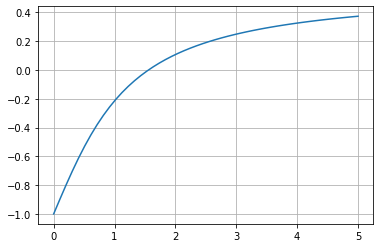

In [27]:
xs = np.linspace(0, 5)
plt.plot(xs, f_aux(xs))
plt.grid()
# verificação de presença de raiz em um intervalo

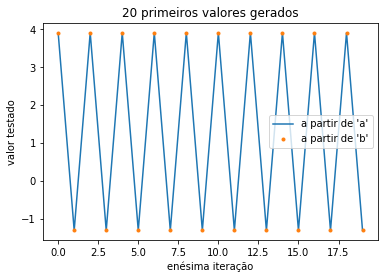

In [28]:
a, b = transição(f_aux, cauchy, 0, 0, 4)
xs0, n0 = newton_solve(f_aux, cauchy, 0, a, full=True)
xs1, n1 = newton_solve(f_aux, cauchy, 0, b, full=True)

plt.plot(range(20), xs0[:20], label = "a partir de 'a'")
plt.plot(range(20), xs1[:20],".", label = "a partir de 'b'")
plt.title("20 primeiros valores gerados")
plt.xlabel("enésima iteração")
plt.ylabel("valor testado")
plt.legend()

ax = plt.gca()

In [29]:
assert len(ax.lines) == 2
assert ax.get_title() != ""
assert ax.get_xlabel() != ""

In [30]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert max(xs) >= 19
    assert  3.5 <= max(ys) <= 4
    assert -1.5 <= min(ys) <= -1

In [31]:
ax = None

Faça um gráfico (usando os 20 pontos gerados a partir de $a$ e $b$) que ajude a ver porque esses métodos estão dando resultados diferentes

Text(0, 0.5, 'diferença entre valores testados')

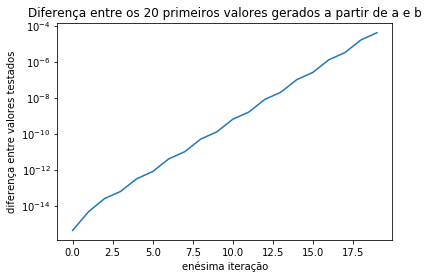

In [32]:
plt.semilogy(abs(np.asarray(xs0[:20]) - np.asarray(xs1[:20])))
plt.title("Diferença entre os 20 primeiros valores gerados a partir de a e b")
plt.xlabel("enésima iteração")
plt.ylabel("diferença entre valores testados")

O que este gráfico mostra?
Porque ajuda a entender o comportamento perto de $a$ e $b$?

Este gráfico mostra a diferença entre os valores testados, a partir de $a$ e $b$, e ele ajuda a entender o comportamento perto daqueles valores, porque mostra que há uma diferença entre os valores que não dava para ver no gráfico de antes.
E outro ponto é que esse crescimento da diferença tem uma taxa exponencial, então valores que começaram com uma diferença muito pequena aumentou em muitas ordens nas 20 primeiras iterações.

Faça o gráfico dos 10 pontos **seguintes** para cada um dos casos, no mesmo eixo.
Use o recorte em $y$ indicado.

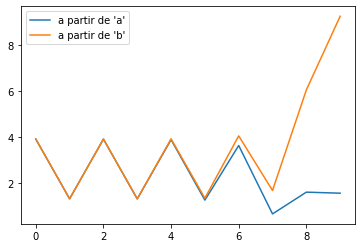

In [33]:
y1 = xs0[20:30]
y2 = xs1[20:30]
xs = range(10)

plt.plot(xs, np.abs(y1), label="a partir de 'a'")
plt.plot(xs, np.abs(y2), label="a partir de 'b'")

plt.legend()

ax = plt.gca()
# ax.set_ylim([-2.08,6.08]);

In [34]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [35]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert 9 == max(xs)

Esse caso é ligeiramente diferente do anterior no comportamento das iterações a partir de $b$.
É um problema de precisão: se houvesse mais números entre $a$ e $b$, seria possível ver o mesmo comportamento.

Explique porquê.

O caso é diferente, pois nesse gráfico, vemos que o $b$ se afasta muito de $a$ depois da sexta iteração. E isso é questão de precisão, pois com mais números entre a e b, se você pegasse os novos limites do intervalo para onde Newton funciona ou não, vc ainda teria os valores iniciais sendo muito próximos, e mas se distanciando de forma exponencial. 

# Parte 2: Autovalores e Autovetores

## Questão 6: O maior autovalor

Dê, abaixo, o código para calcular o maior autovalor de uma matriz $A$, começando a partir do vetor $v$:

In [36]:
def max_ev(A, v, tol=1e-8):
    """Iteração de potência para encontrar Au = lu, com o maior autovalor em módulo de uma matriz.
    Retorna par (autovalor, autovetor), e o número de iterações"""
    n, m = np.shape(A)
    assert n == m
    niters = 0
    vk = v
    while True:
        niters +=1
        yk = np.matmul(A,vk)
        vk = yk/np.linalg.norm(yk)
        b =  np.dot(vk,np.matmul(A,vk))
        if np.allclose(np.matmul(A,vk),b*vk, atol=tol, rtol=tol):
            break
    return vk, b, niters

In [37]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1])
assert l > 4
assert np.allclose(A@u, l*u)
assert 4 < niters < 8

In [38]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1], tol=1e-13)
assert l > 4
assert np.allclose(A@u, l*u, atol=1e-12, rtol=1e-12)
assert 8 < niters < 12

In [39]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7))
assert np.allclose(A@u, l*u)
assert 150 < niters < 250

In [40]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7), tol=1e-12)
assert np.allclose(A@u, l*u, atol=1e-11, rtol=1e-11)
assert 250 < niters < 350

## Questão 7: Variando o vetor inicial

Em $R^2$, podemos variar o vetor inicial dando um ângulo entre $0$ e $2\pi$.
Faça o gráfico do número de iterações necessárias para atingir precisão $10^{-12}$, em função do ângulo.

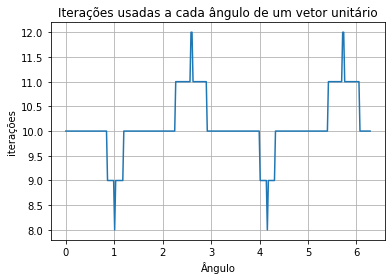

In [41]:
A = [[1, 2], [2,3]]
thetas = np.linspace(0, 2*np.pi, num=300)
def v(x): return [np.cos(x), np.sin(x)]
ns = [max_ev(A, v(theta), tol=1e-12)[2] for theta in thetas]
plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()
ax = plt.gca()

In [42]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [43]:
ax = None

O que você observa no gráfico?

Há um comportamento parecido ao de uma onda quadrada com amplitude 2. Alguns ângulos tomam o mesmo número de iterações, e o padrão parece se repetir com um período de $\pi$.  

## Questão 8: Menos iterações

Faça um "zoom" numa vizinhança do ângulo com menos interações.

In [44]:
def v(x): return [np.cos(x), np.sin(x)]

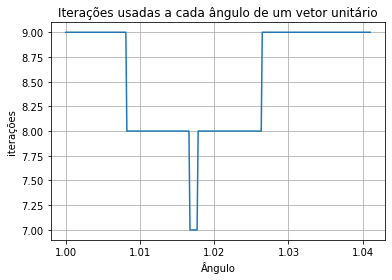

In [45]:
A = [[1, 2], [2,3]]
a, b = 1, 1.041
thetas = np.linspace(a, b, num=300)

ns = [max_ev(A, v(theta), tol=1e-12)[2] for theta in thetas]

plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()
ax = plt.gca()

In [46]:
assert len(ax.lines) == 1

xs = ax.lines[0].get_xdata()
assert max(xs) - min(xs) <= 0.1

ys = ax.lines[0].get_ydata()
assert max(ys) < 10
assert min(ys) < 8

Como calcular um ângulo com menos iterações ainda?
Explique na caixa abaixo, e em seguida calcule $\theta_\text{min}$.

Dica: Veja a função `np.arctan2`.

A ideia é pegar dois thetas que precisam de $n+1$ iterações e que eles tenham o theta com $n$ iterações. <br>
Tendo esses dois thetas faço um novo linspace procurando um theta menor até ver que eles chegaram num mínimo. <br>
Os novos thetas são os novos limites, $a$ e $b$

In [47]:
def find_ib(ns, v, ia): # encontra o índice para o limite superior do novo intervalo de thetas
    while(True):
        ia+=1
        if(ns[ia] == v):
            return ia
        elif(ia == len(ns) - 1):
            return None

In [48]:
a, b = 1, 1.041
def new_thetas():
    global ns, thetas
    ia = np.argmin(ns) - 1
    n = ns[ia]

    ib = find_ib(ns, n, ia)

    a, b = thetas[ia], thetas[ib]

    thetas = np.linspace(a, b, 3000)

    ns = [max_ev(A, v(theta), tol=1e-12)[2] for theta in thetas]

Com isso, faça um gráfico mostrando todos os números de iteração menores do que 8 que você conseguir.

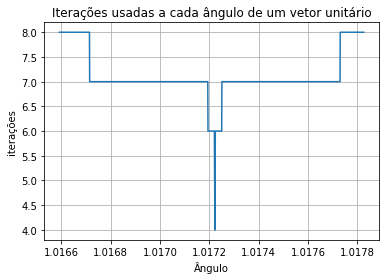

In [49]:
new_thetas()
plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()

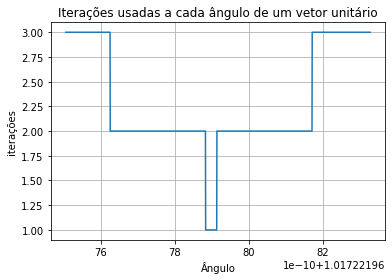

In [50]:
new_thetas()
new_thetas()
plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()

O que você observa no gráfico acima?

Os valores de iterações são decrescentes até certo intervalo, quando o número de iterações fica em 1, e depois passa a ser crescente

O que este gráfico tem a ver com a velocidade de convergência do método?

Como a velocidade depende da quantidade iterações também, ele indica para quais thetas o método vai convergir mais ou menos rapidamente

## Questão 9: Mais iterações

Como calcular o ângulo correspondente ao maior número de iterações?
Explique abaixo, e calcule em seguida.

De forma parecida com a do anterior, mas agora o theta $n$ é aquele com maior iterações 

In [51]:
a, b = 0, 2*np.pi
thetas = np.linspace(a, b, num=300)

ns = [max_ev(A, v(theta), tol=1e-12)[2] for theta in thetas]

def new_big_thetas():
    global ns, thetas
    ia = np.argmax(ns) - 1
    n = ns[ia]

    ib = find_ib(ns, n, ia)

    a, b = thetas[ia], thetas[ib]


    thetas = np.linspace(a, b, 3000)

    ns = [max_ev(A, v(theta), tol=1e-12)[2] for theta in thetas]

Faça, então, um gráfico mostrando, pelo menos, desde 12 até o maior número possível de iterações.

Obs: uma forma de aumentar o número de iterações é reduzir a tolerância.
Só não tente ser "preciso demais", pois isso pode acabar sendo mais do que a precisão do computador,
e daí a iteração nunca mais pára.

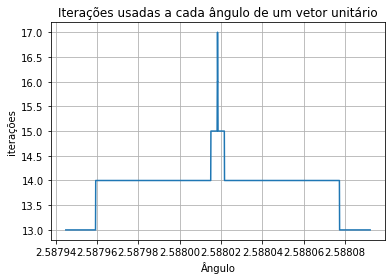

In [52]:
new_big_thetas()
new_big_thetas()
plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()

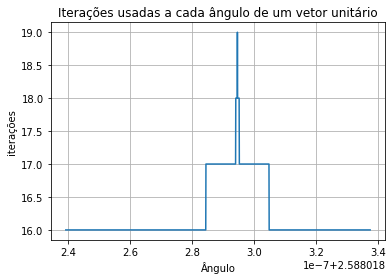

In [53]:
new_big_thetas()
plt.plot(thetas, ns)
plt.title("Iterações usadas a cada ângulo de um vetor unitário")
plt.xlabel("Ângulo")
plt.ylabel("iterações")
plt.grid()

## Questão 10: Aplicação de iteração

Programe a função $h : [-\pi, \pi] \mapsto [-\pi, \pi]$ que, a um ângulo $\theta$,
associa o ângulo do vetor $Av$, onde $v$ tem ângulo $\theta$.

In [54]:
def h(A, theta):
    m, n = np.shape(A)
    assert m == n == 2
    v = np.array([np.cos(theta), np.sin(theta)])
    A = np.array(A)
    r = A@v
    ang = np.arctan2(r[1],r[0])
    return ang

In [55]:
assert h(A, 1) > 1

In [56]:
assert h(A, 2) < 2

In [57]:
assert h(A, -2) < -2

Qual a imagem do intervalo $I_0 = [0, \pi/2]$ por esta aplicação?

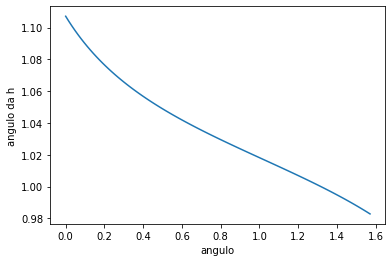

In [58]:
angs = np.linspace(0, np.pi/2, num=100)
plt.plot(angs, [h(A, ang) for ang in angs])
plt.xlabel("angulo")
plt.ylabel("angulo da h");

Agora, faça um gráfico do comprimento da imagem dos intervalos $I_n = h(I_{n-1})$, em função de $n$.

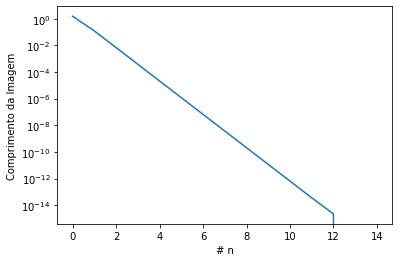

In [59]:
ns = range(15)

I = angs
ls = [I[-1] - I[0]]
for n in ns:
    In = h(A, I)
    ls.append(abs(In[-1] - In[0]))
    I = In

plt.semilogy(ns, ls[:-1])
plt.xlabel("# n")
plt.ylabel("Comprimento da Imagem")

ax = plt.gca()

In [60]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Enfim, faça um gráfico de $h$, no intervalo $[-\pi, \pi]$.

Trace, também, a diagonal $y = x$.

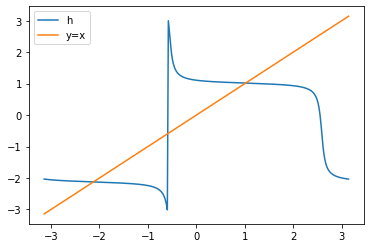

In [61]:
thetas = np.linspace(-np.pi, np.pi, num=300)
plt.plot(thetas, [h(A, theta) for theta in thetas], label="h")
plt.plot(thetas, thetas, label="y=x")
plt.legend()
ax = plt.gca()

In [62]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [63]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert np.isclose(min(xs), -np.pi)
    assert np.isclose(max(xs),  np.pi)
    assert np.isclose(min(ys), -np.pi, rtol=1e-1)
    assert np.isclose(max(ys),  np.pi, rtol=1e-1)

Como esse gráfico ajuda a explicar as questões anteriores?

Os pontos onde as curvas se interceptam correspondem aos pontos de maiores iterações ou menores iterações dependento do quadrante onde está.